<a href="https://colab.research.google.com/github/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/blob/main/7%20Feature%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Engineering & Feature selection**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install openpyxl -q
import openpyxl
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for grid
!pip install geopy -q
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# CatBoost
!pip install catboost -q
from catboost import CatBoostRegressor, Pool
# XGBoost
import xgboost as xgb
# RandomForest
from sklearn.ensemble import RandomForestRegressor
# Linear Regression+l1 Lasso
from sklearn.linear_model import Lasso
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor


from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

!pip -qq install category_encoders
from category_encoders import TargetEncoder

from sklearn.compose import ColumnTransformer


# Set display options
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# apartments = pd.read_excel('https://raw.githubusercontent.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/main/apartments_5.xlsx', engine='openpyxl')

In [33]:
# import pickle

!wget https://github.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/raw/main/apartments5.pkl -q

with open('apartments5.pkl', 'rb') as f:
    apartments = pickle.load(f)


drop notinformative columns Encodinf

In [34]:
apartments.drop(columns=['Host Since','First Review', 'Last Review','Reviews', 'Price Log', 'Latitude_Bin', 'Longitude_Bin', 'Listing ID'], inplace=True)

apartments['Is Superhost'] = apartments['Is Superhost'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Instant Bookable'] = apartments['Instant Bookable'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Is Exact Location'] = apartments['Is Exact Location'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Property Type'] = apartments['Property Type'].replace({'Apartment': 1, 'Condominium': 0}).fillna(0).astype(int)
apartments['Room Type'] = apartments['Room Type'].replace({'Private room': 1, 'Entire home/apt': 0}).fillna(0).astype(int)

apartments['Host Response Time'] = apartments['Host Response Time'].replace(
    {'within an hour':0, 'within a few hours': 1, 'within a day': 2, 'a few days or more': 3 }).fillna(3).astype(int)


In [ ]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
for col in categorical_cols:
  print(f"Value counts for column '{col}' :")
  print(apartments[col].value_counts())
  print(f"NaN values: {apartments[col].isnull().sum()} ")
  print()
  print()

Value counts for column 'Listing ID' :
Listing ID
10002699    1
30934593    1
30947505    1
30946969    1
30946705    1
           ..
20716366    1
20716294    1
20710491    1
20710283    1
9996186     1
Name: count, Length: 19664, dtype: int64
NaN values: 0 


Value counts for column 'neighbourhood' :
neighbourhood
NeukÃ¶lln                3182
Prenzlauer Berg          2550
Kreuzberg                2509
Friedrichshain           2460
Mitte                    1749
Wedding                  1316
SchÃ¶neberg               935
Moabit                    715
Charlottenburg            696
Wilmersdorf               400
Pankow                    272
Rummelsburg               223
Tempelhof                 220
WeiÃensee                181
Lichtenberg               166
Alt-Treptow               156
Tiergarten                153
Steglitz                  135
Reinickendorf             133
Westend                    89
Lichterfelde               89
Friedenau                  77
Baumschulenweg        

In [ ]:
# prompt: значения 'neighbourhood' по которым менее 10 наблюдений заменить на "other"

# neighbourhood_counts = apartments['neighbourhood'].value_counts()
# apartments['neighbourhood'] = np.where(apartments['neighbourhood'].isin(neighbourhood_counts[neighbourhood_counts >= 10].index), apartments['neighbourhood'], 'Other')

# Postal_counts = apartments['Postal Code'].value_counts()
# apartments['Postal Code'] = np.where(apartments['Postal Code'].isin(Postal_counts[Postal_counts >= 10].index), apartments['Postal Code'], 'Other')
# Postal_counts

,count
Postal Code,
10245.0,855
10247.0,749
10437.0,658
10115.0,580
10999.0,542
10405.0,517
10997.0,517
10439.0,507
10119.0,485


# **Random forest**

In [35]:
X = apartments.drop(columns=['Price'])
y = apartments['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

col_train_num = X_train.select_dtypes('number').columns
col_test_num = X_test.select_dtypes('number').columns

X_train[col_train_num] = X_train[col_train_num].fillna(X_train[col_train_num].mean())
X_test[col_test_num] = X_test[col_test_num].fillna(X_train[col_train_num].mean())

col_train_obj = X_train.select_dtypes(exclude='number').columns
col_test_obj = X_test.select_dtypes(exclude='number').columns

# X_train[col_train_obj] = X_train[col_train_obj].fillna('abr@cadabra')
# X_test[col_test_obj] = X_test[col_test_obj].fillna('abr@cadabra')

preprocessor = ColumnTransformer(
    transformers=[
        ('mean_target_encode', TargetEncoder(
                                             min_samples_leaf=10,
                                             #smoothing=10,
                                             handle_missing='value',
                                             handle_unknown='value'
        ), col_train_obj),
     ],
    remainder='passthrough'
)

pipeline = Pipeline([
                    ('preprocessor', preprocessor
                     ),

                    ('model', RandomForestRegressor(n_jobs=-1,
                              n_estimators = 300,
                              # max_depth = 12,
                              min_impurity_decrease = 0.1,
                              min_samples_split = 3,
                              max_features = 'sqrt',
                              random_state = 142
                              ))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


print(f'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(f'Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(f'R²:' , r2_score(y_test, y_test_pred))
print(f'Train MAE:', mean_absolute_error(y_train, y_train_pred))
print(f'Test MAE:', mean_absolute_error(y_test, y_test_pred))

Train RMSE: 14.273042431376032
Test RMSE: 26.571099861234277
R²: 0.5242492171288581
Train MAE: 10.716669101663237
Test MAE: 17.11421061691091


                                   Feature  Importance
11                    remainder__Room Type    0.139966
12                  remainder__Accomodates    0.130819
3              mean_target_encode__Bin-Bin    0.114749
14                     remainder__Bedrooms    0.107454
15                         remainder__Beds    0.051689
16              remainder__Guests Included    0.048515
2          mean_target_encode__Postal Code    0.041855
34         remainder__Distance_from_center    0.030309
13                    remainder__Bathrooms    0.028491
30             remainder__Host Since Years    0.025114
8                     remainder__Longitude    0.025033
0        mean_target_encode__neighbourhood    0.024148
7                      remainder__Latitude    0.024044
31            remainder__Last Review Years    0.022020
29                remainder__Polarity_mean    0.019345
28              remainder__Polarity_median    0.016995
32           remainder__First Review Years    0.016413
33        

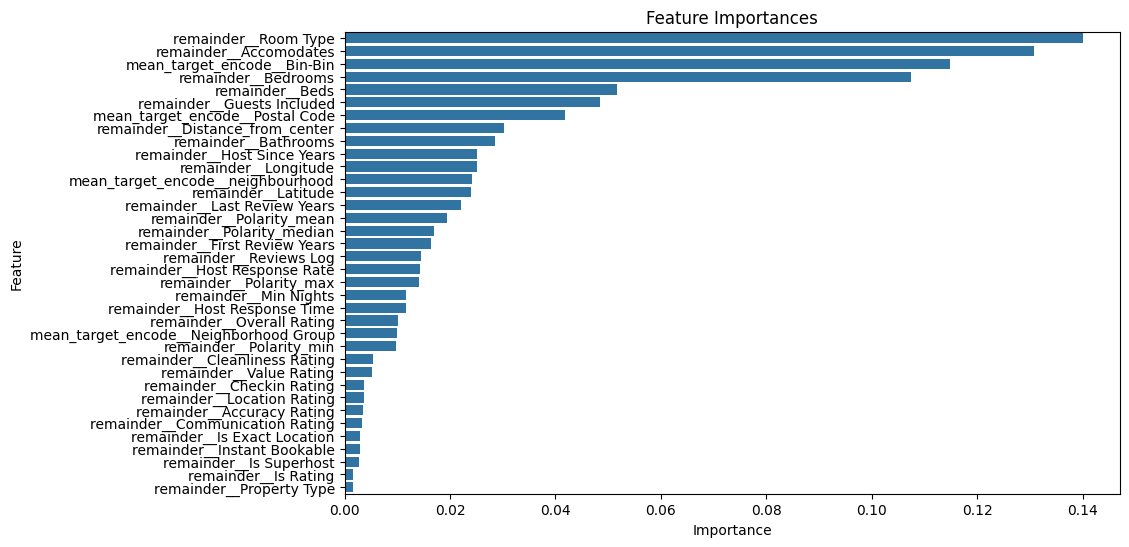

In [36]:
# prompt: важность признаков для RandomForestRegressor

# Get feature importances
importances = pipeline.named_steps['model'].feature_importances_

# Get feature names from preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Print or plot the feature importances
print(feature_importance_df)

# Optionally, plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


# **Lasso**

In [37]:
X = apartments.drop(columns=['Price'])
y = apartments['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

col_train_num = X_train.select_dtypes('number').columns
col_test_num = X_test.select_dtypes('number').columns

X_train[col_train_num] = X_train[col_train_num].fillna(X_train[col_train_num].mean())
X_test[col_test_num] = X_test[col_test_num].fillna(X_train[col_train_num].mean())

col_train_obj = X_train.select_dtypes(exclude='number').columns
col_test_obj = X_test.select_dtypes(exclude='number').columns

# X_train[col_train_obj] = X_train[col_train_obj].fillna('abr@cadabra')
# X_test[col_test_obj] = X_test[col_test_obj].fillna('abr@cadabra')

preprocessor = ColumnTransformer(
    transformers=[
        ('mean_target_encode', TargetEncoder(
                                             min_samples_leaf=10,
                                             #smoothing=10,
                                             handle_missing='value',
                                             handle_unknown='value'
        ), col_train_obj),
     ],
    remainder='passthrough'
)

pipeline = Pipeline([
                    ('preprocessor', preprocessor
                     ),

                    ('model', Lasso(alpha = 0.02, max_iter=100000))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


print(f'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(f'Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(f'R²:' , r2_score(y_test, y_test_pred))
print(f'Train MAE:', mean_absolute_error(y_train, y_train_pred))
print(f'Test MAE:', mean_absolute_error(y_test, y_test_pred))

Train RMSE: 24.76154445826271
Test RMSE: 27.556610307413397
R²: 0.4883039814490774
Train MAE: 16.76468047737876
Test MAE: 18.161692499471144


                                   Feature  Importance
11                    remainder__Room Type  -19.072167
8                     remainder__Longitude  -14.717272
14                     remainder__Bedrooms   12.760017
13                    remainder__Bathrooms    9.972818
12                  remainder__Accomodates    6.638966
16              remainder__Guests Included    6.630135
29                remainder__Polarity_mean    5.000239
24                 remainder__Value Rating   -4.106765
10                remainder__Property Type   -4.016373
6                  remainder__Is Superhost    3.355687
5            remainder__Host Response Rate   -3.224562
33                  remainder__Reviews Log   -2.448124
20           remainder__Cleanliness Rating    2.254306
31            remainder__Last Review Years   -2.134414
4            remainder__Host Response Time   -1.887282
28              remainder__Polarity_median    1.844214
34         remainder__Distance_from_center   -1.117216
3         

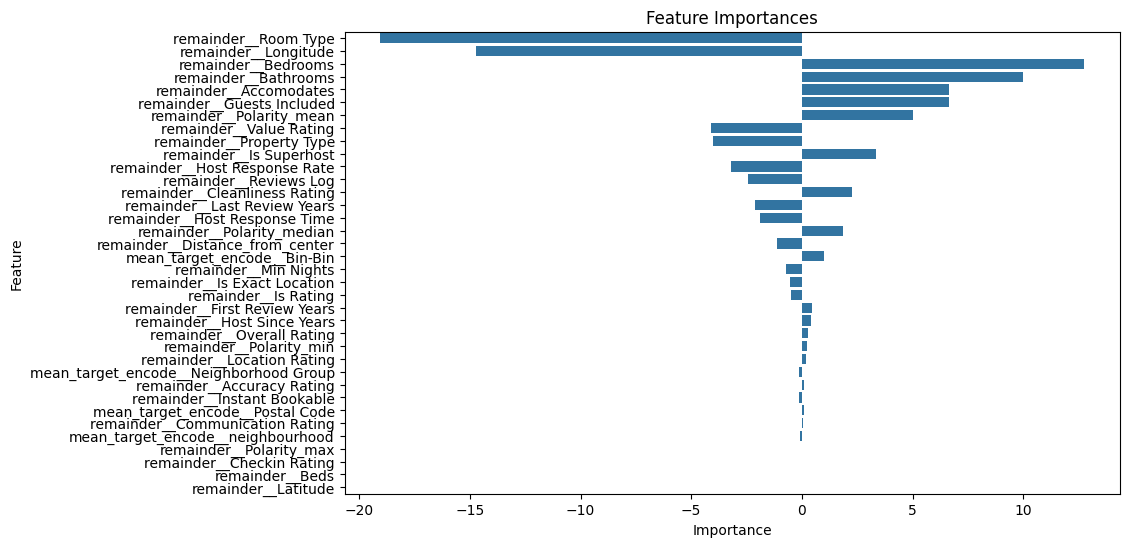

In [38]:
# prompt: важность признаков для Lasso и график

# Get feature importances
importances = pipeline.named_steps['model'].coef_

# Get feature names from preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', key = abs,  ascending=False)

# Print or plot the feature importances
print(feature_importance_df)

# Optionally, plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


# CatBoost
for CatBost no nessery to make encoding and Nan

In [40]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# !pip install catboost -q
# from catboost import CatBoostRegressor, Pool  # Now CatBoost is available

X = apartments.drop(['Price'], axis=1)
y = apartments['Price']

num_features = X.select_dtypes(include='number').columns
cat_features = X.select_dtypes(exclude='number').columns

for col in cat_features:
    if X[col].dtype != 'str':
        X[col] = X[col].astype(str)

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Convert cat_features to a list
cat_features = cat_features.tolist()  # This is the key change

# Создаем модели для обучающей и тестовой выборок с указанием категориальных признаков
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Инициализируем и обучаем модель
model = CatBoostRegressor(iterations=2000, learning_rate=0.02, depth=6, verbose=100)
model.fit(train_pool)

# Предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

# Вычисляем метрики для обучающей выборки
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Вычисляем метрики для тестовой выборки
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Выводим метрики на обучающей выборке
print("Metrics on Training Set:")
print(f"Mean Squared Error: {train_mse}")
print(f"Mean Absolute Error: {train_mae}")
print(f"R^2 Score: {train_r2}")

# Выводим метрики на тестовой выборке
print("\nMetrics on Test Set:")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R^2 Score: {test_r2}")


# Выводим важность признаков
feature_importances = model.get_feature_importance(train_pool)
# Create a list of tuples (feature_name, importance)
feature_importance_tuples = []
for feature_index in range(len(feature_importances)):
    if feature_index < len(num_features):
        feature_name = num_features[feature_index]
    else:
        feature_name = cat_features[feature_index - len(num_features)]
    importance = feature_importances[feature_index]
    feature_importance_tuples.append((feature_name, importance))

# Sort the list of tuples by importance in descending order
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature_name, importance in feature_importance_tuples:
    print(f'Feature: {feature_name}, Importance: {importance}')


0:	learn: 38.3285616	total: 30.1ms	remaining: 1m
100:	learn: 26.3184491	total: 2.04s	remaining: 38.4s
200:	learn: 25.0096328	total: 5.67s	remaining: 50.7s
300:	learn: 24.4625071	total: 9.17s	remaining: 51.8s
400:	learn: 24.0842339	total: 12.8s	remaining: 51.1s
500:	learn: 23.7513489	total: 14.8s	remaining: 44.3s
600:	learn: 23.4325902	total: 17.5s	remaining: 40.7s
700:	learn: 23.1238748	total: 20.6s	remaining: 38.1s
800:	learn: 22.8808752	total: 22.6s	remaining: 33.8s
900:	learn: 22.6472165	total: 24.5s	remaining: 29.9s
1000:	learn: 22.4356655	total: 26.5s	remaining: 26.5s
1100:	learn: 22.2501518	total: 28.5s	remaining: 23.2s
1200:	learn: 22.0619013	total: 31.2s	remaining: 20.8s
1300:	learn: 21.8950085	total: 34.2s	remaining: 18.4s
1400:	learn: 21.7378900	total: 36.2s	remaining: 15.5s
1500:	learn: 21.5782577	total: 38.1s	remaining: 12.7s
1600:	learn: 21.4331559	total: 40.1s	remaining: 9.99s
1700:	learn: 21.2752973	total: 42s	remaining: 7.38s
1800:	learn: 21.1321905	total: 44.7s	remaini

                 Feature  Importance
0               Bedrooms   17.180767
1                   Beds   12.227923
2             Min Nights    9.751448
3        Accuracy Rating    5.518591
4        Guests Included    5.387773
5      Is Exact Location    4.700181
6               Latitude    3.706029
7            Postal Code    3.627380
8            Reviews Log    3.232755
9   Distance_from_center    3.136845
10             Room Type    3.003701
11             Is Rating    2.952272
12    Host Response Rate    2.277755
13         Property Type    2.198542
14    Cleanliness Rating    2.071636
15          Polarity_max    1.941269
16     Last Review Years    1.862327
17    Neighborhood Group    1.771079
18    First Review Years    1.750317
19        Overall Rating    1.671663
20        Checkin Rating    1.516250
21    Host Response Time    1.464679
22             Longitude    1.405100
23       Location Rating    1.108810
24      Host Since Years    1.042825
25         neighbourhood    0.934234
2

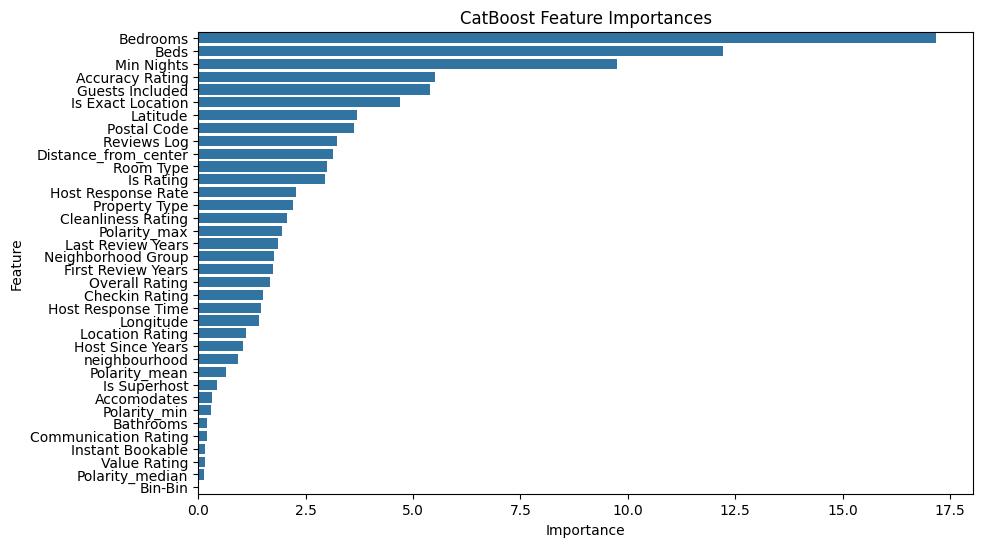

In [41]:
# prompt: важность признаков для CatBoostRegressor и добавь график вроде # Print or plot the feature importances

# Выводим важность признаков
feature_importances = model.get_feature_importance(train_pool)
# Create a list of tuples (feature_name, importance)
feature_importance_tuples = []
for feature_index in range(len(feature_importances)):
    if feature_index < len(num_features):
        feature_name = num_features[feature_index]
    else:
        feature_name = cat_features[feature_index - len(num_features)]
    importance = feature_importances[feature_index]
    feature_importance_tuples.append((feature_name, importance))

# Sort the list of tuples by importance in descending order
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame(feature_importance_tuples, columns=['Feature', 'Importance'])

# Print or plot the feature importances
print(feature_importance_df)

# Optionally, plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('CatBoost Feature Importances')
plt.show()


# XGBRegressor

## TargetEncoder

In [43]:
X = apartments.drop(columns=['Price'])
y = apartments['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

col_train_num = X_train.select_dtypes('number').columns
col_test_num = X_test.select_dtypes('number').columns

X_train[col_train_num] = X_train[col_train_num].fillna(X_train[col_train_num].mean())
X_test[col_test_num] = X_test[col_test_num].fillna(X_train[col_train_num].mean())

col_train_obj = X_train.select_dtypes(exclude='number').columns
col_test_obj = X_test.select_dtypes(exclude='number').columns

# X_train[col_train_obj] = X_train[col_train_obj].fillna('abr@cadabra')
# X_test[col_test_obj] = X_test[col_test_obj].fillna('abr@cadabra')

preprocessor = ColumnTransformer(
    transformers=[
        ('mean_target_encode', TargetEncoder(
                                             min_samples_leaf=10,
                                             #smoothing=10,
                                             handle_missing='value',
                                             handle_unknown='value'
        ), col_train_obj),
     ],
    remainder='passthrough'
)

pipeline = Pipeline([
                    ('preprocessor', preprocessor
                     ),

                    ('model', xgb.XGBRegressor(
                        n_estimators=1000,
                        learning_rate=0.02,
                        max_depth=5,
                        verbosity=1))
])


# Определим eval_set для контроля обучения
# eval_set = [(X_train, y_train), (X_test, y_test)]

# # Обучим модель с выводом RMSE на каждой итерации, убираем evals_result
# model.fit(X_train, y_train, eval_set=eval_set, verbose=True)



pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


print(f'Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(f'Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print(f'R²:' , r2_score(y_test, y_test_pred))
print(f'Train MAE:', mean_absolute_error(y_train, y_train_pred))
print(f'Test MAE:', mean_absolute_error(y_test, y_test_pred))

Train RMSE: 18.00380005273994
Test RMSE: 26.465180784614198
R²: 0.5280345815382221
Train MAE: 12.36634395090852
Test MAE: 16.945884523699675


## LabelEncoder

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = apartments

# Выделяем категориальные признаки
categorical_features = df.select_dtypes(exclude='number').columns


# Закодируем категориальные переменные
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Разделим признаки и целевую переменную
X = df.drop('Price', axis=1)
y = df['Price']

# Разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=179)

# Создадим объект модели
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=5, verbosity=1)


# Определим eval_set для контроля обучения
eval_set = [(X_train, y_train), (X_test, y_test)]

# Обучим модель с выводом RMSE на каждой итерации, убираем evals_result
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# # Обучим модель
# model.fit(X_train, y_train)

# Предсказания на тренировочной и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Вывод метрик
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Training R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

# Важность признаков
importance = model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Вывод важности признаков в порядке убывания
print("\nFeature importance in descending order:")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")


[0]	validation_0-rmse:38.27791	validation_1-rmse:38.16144
[1]	validation_0-rmse:37.88844	validation_1-rmse:37.81285
[2]	validation_0-rmse:37.51121	validation_1-rmse:37.47468
[3]	validation_0-rmse:37.14252	validation_1-rmse:37.14792
[4]	validation_0-rmse:36.78529	validation_1-rmse:36.82569
[5]	validation_0-rmse:36.43752	validation_1-rmse:36.51623
[6]	validation_0-rmse:36.10019	validation_1-rmse:36.21411
[7]	validation_0-rmse:35.76915	validation_1-rmse:35.92328
[8]	validation_0-rmse:35.45046	validation_1-rmse:35.64109
[9]	validation_0-rmse:35.13937	validation_1-rmse:35.37170
[10]	validation_0-rmse:34.83896	validation_1-rmse:35.10552
[11]	validation_0-rmse:34.54370	validation_1-rmse:34.85131
[12]	validation_0-rmse:34.26062	validation_1-rmse:34.60561
[13]	validation_0-rmse:33.98433	validation_1-rmse:34.36302
[14]	validation_0-rmse:33.71390	validation_1-rmse:34.13676
[15]	validation_0-rmse:33.45310	validation_1-rmse:33.90580
[16]	validation_0-rmse:33.19839	validation_1-rmse:33.69250
[17]	va


Feature importance in descending order:
Host Since Years: 1822.0
Postal Code: 1681.0
Accomodates: 1575.0
Longitude: 1567.0
First Review Years: 1497.0
Distance_from_center: 1458.0
Last Review Years: 1404.0
Latitude: 1161.0
Bin-Bin: 1072.0
Polarity_mean: 927.0
Host Response Rate: 898.0
Polarity_median: 895.0
neighbourhood: 820.0
Bedrooms: 784.0
Guests Included: 750.0
Reviews Log: 717.0
Polarity_max: 715.0
Overall Rating: 655.0
Min Nights: 628.0
Beds: 547.0
Room Type: 532.0
Polarity_min: 519.0
Host Response Time: 476.0
Neighborhood Group: 412.0
Value Rating: 410.0
Cleanliness Rating: 352.0
Bathrooms: 303.0
Checkin Rating: 293.0
Communication Rating: 147.0
Is Superhost: 144.0
Property Type: 134.0
Instant Bookable: 119.0
Is Exact Location: 116.0
Location Rating: 96.0
Accuracy Rating: 92.0


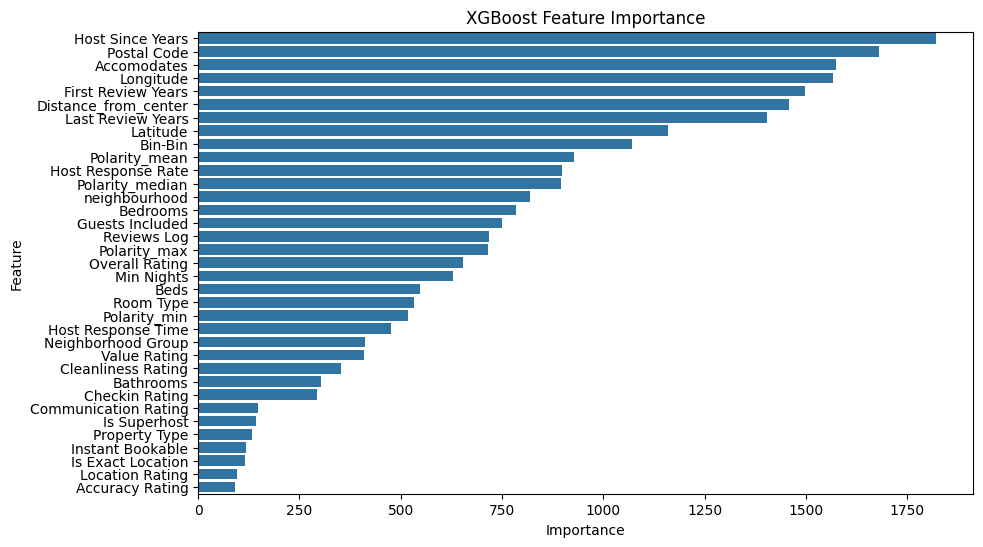

In [46]:
# prompt: важность признаков для XGBoostRegressor и добавь график

# Важность признаков
importance = model.get_booster().get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Вывод важности признаков в порядке убывания
print("\nFeature importance in descending order:")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")

# Создание DataFrame для визуализации
importance_df = pd.DataFrame(sorted_importance, columns=['Feature', 'Importance'])

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.show()


# AdaBoost

# Encoding

Converting categorical data to numerical

In [ ]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
for col in categorical_cols:
  print(f"Value counts for column '{col}' :")
  print(apartments[col].value_counts())
  print(f"NaN values: {apartments[col].isnull().sum()} ")
  print()
  print()

In [ ]:
# Perform one-hot encoding and drop the first column
neighborhood_dummies = pd.get_dummies(apartments['Neighborhood Group'], prefix='Neighborhood', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
apartments = pd.concat([apartments, neighborhood_dummies], axis=1)

In [ ]:
numeric_columns = apartments.select_dtypes(include=['number']).columns

print(numeric_columns)

Index(['Host Response Time', 'Host Response Rate', 'Is Superhost', 'Latitude',
       'Longitude', 'Is Exact Location', 'Property Type', 'Room Type',
       'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'Overall Rating',
       'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating',
       'Communication Rating', 'Location Rating', 'Value Rating',
       'Instant Bookable', 'Polarity_min', 'Polarity_max', 'Polarity_median',
       'Polarity_mean', 'Host Since Years', 'Last Review Years',
       'First Review Years', 'Latitude_Bin', 'Longitude_Bin', 'Price Log',
       'Reviews Log', 'Distance_from_center'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

numeric_columns = numeric_columns.drop(['Price Log'])

df = apartments[numeric_columns].copy()

# Предположим, что df - ваш датафрейм
X = df.drop('Price', axis=1)
y = df['Price']

# Создаем модель Лассо
model = Lasso(alpha=0.1)  # Параметр alpha регулирует степень регуляризации
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"\n Lasso")
print(f"R^2: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


# Важность признаков
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Feature importance using Lasso:")
print(feature_importance)

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#apartments.to_excel('apartments_6.xlsx', index=False)

# import pickle
with open('apartments6.pkl', 'wb') as f:
    pickle.dump(apartments, f)


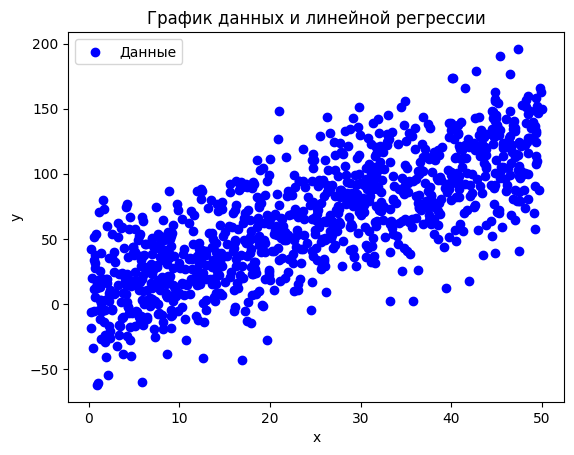

0.5846297813720505

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Случайные данные с известным R^2
np.random.seed(42)
x = np.random.rand(1000, 1) * 50  # переменная x в диапазоне от 0 до 10
y = 2.5 * x + np.random.normal(0, 30, size=(1000, 1))  # линейная зависимость с добавлением шума

# Модель линейной регрессии
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Подсчет R^2
r2 = r2_score(y, y_pred)


# Построение графика
plt.scatter(x, y, color='blue', label='Данные')
##plt.plot(x, y_pred, color='red', label=f'Линейная регрессия\n$R^2$ = {r2:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График данных и линейной регрессии')
plt.legend()
plt.show()

r2